In [2]:
jd = """About Checkr
Checkr is building the data platform to power safe and fair decisions. Established in 2014, Checkr’s innovative technology and robust data platform help customers assess risk and ensure safety and compliance to build trusted workplaces and communities. Checkr has over 100,000 customers including DoorDash, Coinbase, Lyft, Instacart, and Airtable.

We’re a team that thrives on solving complex problems with innovative solutions that advance our mission. Checkr is recognized on Forbes Cloud 100 2024 List and is a Y Combinator 2024 Breakthrough Company.

About the team/role

We seek a highly skilled and experienced Senior Data Analyst to join our Business Intelligence & Analytics team. This pivotal role will report directly to the Director of BI and will be instrumental in driving data-informed decision-making across the organization. The ideal candidate for this role will be a hands-on analytics leader who has a track record of building strong trusted partnerships with senior leadership in the company to execute complex cross-functional data initiatives. Ideally, they will be familiar with 1 or more of the following functions - Finance Analytics, Enterprise Analytics, RevOps, and/or Product. Additionally, this person will have excellent presentation skills as a core part of the role is briefing Checkr’s E-Staff with operational insights and analysis and making well-informed, data-driven recommendations to positively impact the business.

What you'll do

Operational Deep Dives: Tackle complex business questions where the data and insights lie across 1 or more  organizations. Use data to crystalize insights and present them to senior leadership. The type of questions the person would tackle are  “Why did Revenue/ Usage drop by X% in a month? Is this a one off or part of a long term trend”. “What are key drivers of growth in the customer base?”, “Which promotional strategy contributed to long term growth?”
KPI Development, Reporting and Analysis: Own the reporting and analysis of Checkr KPI metrics. At times this may involve detecting issues in the metric and triaging  them with Data Engineering/Finance. Suggest & lead the development of new KPIs in support of business health.
Operational Reporting: Work with various teams (People Ops, FinOps)  to lead the development and maintenance of comprehensive operational dashboards across the company. Present operational reports to leaders on a regular basis. 
Data Asset  Development: Spearhead projects to build new data assets and capabilities (e.g., cohort tooling, anomaly detection). 
What you bring

Bachelor's degree in a quantitative field (e.g., Statistics, Mathematics, Computer Science, Engineering); Master's degree preferred.
4+ years of experience in data analytics, business intelligence, or a related field.
Strong proficiency in SQL.
Familiarity with statistical concepts, including model evaluation metrics, forecasting methodologies, and confidence intervals.
Experience with data visualization tools and techniques. Looker preferred.
Excellent problem-solving and analytical skills.
Outstanding communication and presentation abilities, particularly for senior audiences.
Proven track record of managing complex, cross-functional projects.
What you’ll get

A fast-paced and collaborative environment
Learning and development allowance
Competitive cash and equity compensation and opportunity for advancement
100% medical, dental, and vision coverage
Up to $25K reimbursement for fertility, adoption, and parental planning services
Flexible PTO policy
Monthly wellness stipend, home office stipend
At Checkr, we believe a hybrid work environment strengthens collaboration, drives innovation, and encourages connection. Our hub locations are Denver, CO, San Francisco, CA, and Santiago, Chile. Individuals are expected to work from the office 2 to 3 days a week. In-office perks are provided, such as lunch four times a week, a commuter stipend, and an abundance of snacks and beverages. 

One of Checkr’s core values is Transparency. To live by that value, we’ve made the decision to disclose salary ranges in all of our job postings. We use geographic cost of labor as an input to develop ranges for our roles and as such, each location where we hire may have a different range. If this role is remote, we have listed the top to the bottom of the possible range, but we will specify the target range for an exact location when you are selected for a recruiting discussion. For more information on our compensation philosophy, see our website.

The base salary range for this role is $135,000 - $159,000 in San Francisco, CA.

Equal Employment Opportunities at Checkr

Checkr is committed to hiring talented and qualified individuals with diverse backgrounds for all of its tech, non-tech, and leadership roles. Checkr believes that the gathering and celebration of unique backgrounds, qualities, and cultures enriches the workplace.  """

LangChain Key Imported
OpenAI Key Imported


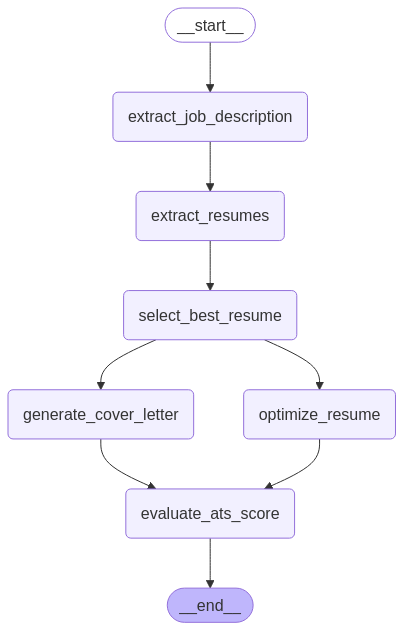

⚠️ ATS score before optimization was not numeric: Please provide the job description and the resume you would like me to evaluate, and I will give you the ATS score.
⚠️ ATS score after optimization was not numeric: Please provide the job description and the relevant sections of your resume for evaluation.
📌 Job Description:
Please provide the job description you would like me to analyze, and I will extract the key details for you.

--------------------------------------------------------------------------------

📌 Extracted Resumes:
🔹 Resume 1:
No matching resume found for PLEASE PROVIDE THE JOB DESCRIPTION SO I CAN DETERMINE THE PRIMARY JOB ROLE. role.

--------------------------------------------------------------------------------

📌 Best Matching Resume:
It seems that you haven't provided the job description (JD) or the resumes to compare against it. Please share the job description and the resumes you would like me to evaluate, and I will help you determine the best match.

------

In [12]:
# ------------------ Imports ------------------
import os
from dotenv import load_dotenv
from typing import TypedDict, List
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema import HumanMessage, SystemMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import PyPDF2
import time
import requests
# ------------------ Environment Setup ------------------
load_dotenv()  # Load environment variables from .env file

# Retrieve API keys from environment variables
lang_api_key = os.getenv("LANGCHAIN_API_KEY")
openai_api_key = os.getenv("OPENAI_API_KEY")

if lang_api_key:
    print("LangChain Key Imported")
else:
    print("No LangChain Key")

if openai_api_key:
    print("OpenAI Key Imported")
else:
    print("No OpenAI Key")

# Set additional environment variables
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "coverletter2"

# ------------------ LLM Initialization ------------------
openai_model = "gpt-4o-mini"
llm = ChatOpenAI(temperature=0.0, model=openai_model)

# ------------------ Tools ------------------
tools = [TavilySearchResults(max_results=1)]  # Add TavilySearchResults tool

# ------------------ State Definition ------------------
class State(TypedDict):
    job_description: str
    job_role: str
    resumes: List[dict]
    best_resume: dict
    cover_letter: str
    optimized_resume: dict
    ats_score_before: float
    ats_score_after: float

# ------------------ Helper Function for Resume Extraction ------------------
def extract_text_from_pdf(pdf_path):
    """Extracts text from a given PDF file."""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
    return text

# ------------------ Nodes ------------------

def extract_job_description(state: State):
    """Extracts structured data from a job description and determines the job role."""
    
    # Create a chat prompt template
    prompt = ChatPromptTemplate.from_messages([
        SystemMessage(content="You are an AI assistant specialized in analyzing job descriptions. Your task is to extract key details and determine the primary job role."),
        HumanMessage(content="Extract key details (Company, Role, Must-Have Skills) from this job description: {job_description}")
    ])
    
    # Format the prompt with the actual job description
    formatted_prompt = prompt.format_messages(job_description=state['job_description'])
    
    # Invoke the LLM with the formatted prompt
    msg = llm.invoke(formatted_prompt)
    
    # Determine the job role
    role_prompt = ChatPromptTemplate.from_messages([
        SystemMessage(content="Based on the job description, determine the primary job role. Choose from: PA (Product Analyst), BA (Business Analyst), DA (Data Analyst), or Other."),
        HumanMessage(content="Job Description: {job_description}\nReturn only the abbreviation of the primary role.")
    ])
    
    formatted_role_prompt = role_prompt.format_messages(job_description=state['job_description'])
    role_msg = llm.invoke(formatted_role_prompt)
    
    job_role = role_msg.content.strip().upper()
    
    return {
        "job_description": msg.content,
        "job_role": job_role
    }


def extract_resumes(state: State):
    """Extracts structured data from the resume matching the job role."""
    resume_folder = "pdfs/"  # Folder containing resumes
    job_role = state['job_role']
    
    # Find the matching resume file
    matching_resume = None
    for file in os.listdir(resume_folder):
        if file.endswith(f"{job_role}.pdf"):
            matching_resume = os.path.join(resume_folder, file)
            break
    
    if matching_resume:
        resume_text = extract_text_from_pdf(matching_resume)
        msg = llm.invoke(f"Extract Name, Skills, Experience, Education from this resume: {resume_text}")
        return {"resumes": [msg.content]}
    else:
        return {"resumes": [f"No matching resume found for {job_role} role."]}


def select_best_resume(state: State):
    """Compares resumes against JD requirements and selects the best match."""
    msg = llm.invoke(f"Compare these resumes against the JD and return the best match: {state['resumes']}")
    return {"best_resume": msg.content}

def generate_cover_letter(state: State):
    """Generates a personalized cover letter based on the selected resume and JD."""
    msg = llm.invoke(f"Write a personalized cover letter for {state['best_resume']} using the JD {state['job_description']}")
    return {"cover_letter": msg.content}

def optimize_resume(state: State):
    """Improves resume bullet points based on JD skills."""
    msg = llm.invoke(f"Refine resume bullets to better match JD skills: {state['best_resume']}")
    return {"optimized_resume": msg.content}

def evaluate_ats_score(state: State):
    """Computes ATS score before & after resume optimization."""

    job_description = state['job_description']
    best_resume = state['best_resume']
    optimized_resume = state['optimized_resume']

    # Ensure the LLM understands to only return a number
    msg_before = llm.invoke(
        f"Evaluate ATS score (out of 100) by comparing the following resume to the given job description.\n\n"
        f"Job Description:\n{job_description}\n\n"
        f"Resume:\n{best_resume}\n\n"
        "Return only a numeric score."
    )

    msg_after = llm.invoke(
        f"Evaluate ATS score (out of 100) by comparing the following optimized resume to the given job description.\n\n"
        f"Job Description:\n{job_description}\n\n"
        f"Optimized Resume:\n{optimized_resume}\n\n"
        "Return only a numeric score."
    )

    # Add error handling to handle cases where the LLM doesn't return a number
    try:
        ats_before = float(msg_before.content.strip())
    except ValueError:
        ats_before = None
        print("⚠️ ATS score before optimization was not numeric:", msg_before.content)

    try:
        ats_after = float(msg_after.content.strip())
    except ValueError:
        ats_after = None
        print("⚠️ ATS score after optimization was not numeric:", msg_after.content)

    return {
        "ats_score_before": ats_before,
        "ats_score_after": ats_after
    }

# ------------------ Build Workflow ------------------
workflow = StateGraph(State)

# Add nodes to workflow
workflow.add_node("extract_job_description", extract_job_description)
workflow.add_node("extract_resumes", extract_resumes)
workflow.add_node("select_best_resume", select_best_resume)
workflow.add_node("generate_cover_letter", generate_cover_letter)
workflow.add_node("optimize_resume", optimize_resume)
workflow.add_node("evaluate_ats_score", evaluate_ats_score)

# Define edges for execution flow
workflow.add_edge(START, "extract_job_description")
workflow.add_edge("extract_job_description", "extract_resumes")
workflow.add_edge("extract_resumes", "select_best_resume")
workflow.add_edge("select_best_resume", "generate_cover_letter")
workflow.add_edge("select_best_resume", "optimize_resume")
workflow.add_edge("optimize_resume", "evaluate_ats_score")
workflow.add_edge("generate_cover_letter", "evaluate_ats_score")
workflow.add_edge("evaluate_ats_score", END)

# Compile workflow and visualize it
compiled_workflow = workflow.compile()

# Retry logic with timeout for Mermaid API request
for _ in range(3):  # Try up to 3 times
    try:
        mermaid_image_url = compiled_workflow.get_graph().draw_mermaid_png()
        display(Image(mermaid_image_url))  # No 'timeout' argument here
        break  # Exit loop if successful
    except requests.exceptions.ReadTimeout:
        print("⚠️ Mermaid API timeout. Retrying...")
        time.sleep(5)  # Wait before retrying


# ------------------ Final Output ------------------

# Run workflow
state = compiled_workflow.invoke({
    "job_description": jd,
    "resumes": []  # Resume PDFs will be extracted from the folder
})
# print("\n🚀 Final Output:\n")

print("📌 Job Description:")
print(state["job_description"])
print("\n" + "-" * 80 + "\n")

print("📌 Extracted Resumes:")
for i, resume in enumerate(state["resumes"], start=1):
    print(f"🔹 Resume {i}:")
    print(resume)
    print("\n" + "-" * 80 + "\n")

print("📌 Best Matching Resume:")
print(state["best_resume"])
print("\n" + "-" * 80 + "\n")

print("📌 Generated Cover Letter:")
print(state["cover_letter"])
print("\n" + "-" * 80 + "\n")

print("📌 Optimized Resume:")
print(state["optimized_resume"])
print("\n" + "-" * 80 + "\n")

print(f"📌 ATS Score Before Optimization: {state['ats_score_before']}/100")
print(f"📌 ATS Score After Optimization: {state['ats_score_after']}/100")


LangChain Key Imported
OpenAI Key Imported


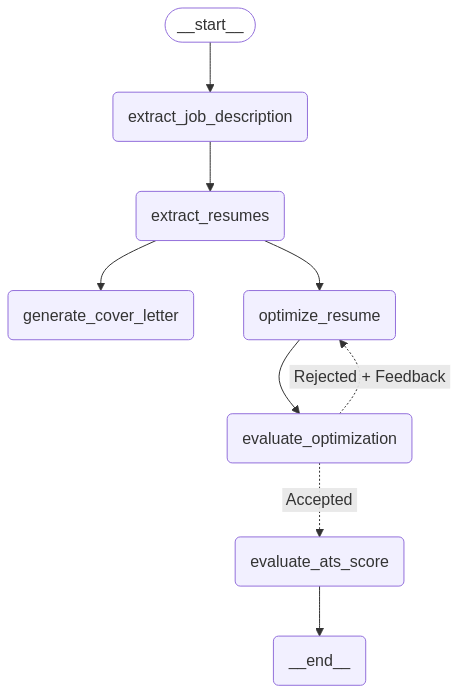


🚀 Final Output:

📌 Job Description:
Please provide the job description text so I can extract the key details for you.

--------------------------------------------------------------------------------

📌 Extracted Resume:
**Name:** Pranav Garg

**Skills:**
- **Software:** Azure, AWS, Snowflake, Coupa, Power BI, Docker, SAP, Oracle Git, SAP Modules (PP, M), GCP, Hadoop, Excel
- **Languages:** R, Python (NumPy, Pandas, Scikit-learn, Keras, LangChain, LLM), SQL, Java, RDBMS, HTML, C, C++, Shell Script
- **Concepts:** GenAI, LLM, NLP, Forecasting, Regression, Classification, Deep Learning, ERP Transformation, BigQuery
- **Data Science:** Data Exploration, Data Cleaning, Data Analysis, Data Visualization, Data Mining, Predictive Data Models, Text Mining, ETL, Machine Learning
- **Soft Skills:** Communication Skills, Agile Methodology, People Management, Team Motivation, Adaptability, Business Strategy
- **Certifications:** Microsoft Azure Fundamentals, Snowflake: Data Warehouse, Data Scienc

In [4]:
# ------------------ Imports ------------------
import os
from dotenv import load_dotenv
from typing import TypedDict, List, Literal
from pydantic import BaseModel, Field
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema import HumanMessage, SystemMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import PyPDF2
from langchain.output_parsers import PydanticOutputParser

# ------------------ Environment Setup ------------------
load_dotenv()  # Load environment variables from .env file

# Retrieve API keys from environment variables
lang_api_key = os.getenv("LANGCHAIN_API_KEY")
openai_api_key = os.getenv("OPENAI_API_KEY")

if lang_api_key:
    print("LangChain Key Imported")
else:
    print("No LangChain Key")

if openai_api_key:
    print("OpenAI Key Imported")
else:
    print("No OpenAI Key")

# Set additional environment variables
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "coverletter2"

# ------------------ LLM Initialization ------------------
openai_model = "gpt-4o-mini"
llm = ChatOpenAI(temperature=0.0, model=openai_model)

# ------------------ Tools ------------------
tools = [TavilySearchResults(max_results=1)]  # Add TavilySearchResults tool

# ------------------ State Definition ------------------
class State(TypedDict):
    job_description: str
    job_role: str
    resumes: List[dict]
    cover_letter: str
    optimized_resume: dict
    ats_score_before: float
    ats_score_after: float
    feedback: str
    improvement_needed: str

# ------------------ Evaluator Optimizer Schema ------------------
class ResumeFeedback(BaseModel):
    improvement_needed: Literal["yes", "no"] = Field(
        description="Determine if the optimized resume needs further improvement. Return 'yes' or 'no'."
    )
    feedback: str = Field(
        description="Provide constructive feedback if improvements are needed."
    )

parser = PydanticOutputParser(pydantic_object=ResumeFeedback)

# ------------------ Helper Function for Resume Extraction ------------------
def extract_text_from_pdf(pdf_path):
    """Extracts text from a given PDF file."""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
    return text

# ------------------ Nodes ------------------

def extract_job_description(state: State):
    """Extracts structured data from a job description and determines the job role."""
    
    prompt = ChatPromptTemplate.from_messages([
        SystemMessage(content="You are an AI assistant specialized in analyzing job descriptions. Extract key details and determine the job role."),
        HumanMessage(content="Extract Company, Role, and Must-Have Skills from this job description: {job_description}")
    ])
    
    formatted_prompt = prompt.format_messages(job_description=state['job_description'])
    msg = llm.invoke(formatted_prompt)
    
    return {"job_description": msg.content}


# def extract_resumes(state: State):
#     """Finds and extracts the resume matching the job role."""
#     resume_folder = "pdfs/"  # Folder containing resumes
#     job_role = state['job_role']
    
#     matching_resume = None
#     for file in os.listdir(resume_folder):
#         if file.endswith(f"{job_role}.pdf"):
#             matching_resume = os.path.join(resume_folder, file)
#             break
    
#     if matching_resume:
#         resume_text = extract_text_from_pdf(matching_resume)
#         msg = llm.invoke(f"Extract structured details (Name, Skills, Experience, Education) from this resume: {resume_text}")
#         return {"resumes": [msg.content]}
#     else:
#         return {"resumes": [f"No matching resume found for {job_role} role."]}

def extract_resumes(state: State):
    """Extracts structured data from resumes stored in a folder."""
    resume_folder = "pdfs/"  # Folder containing resumes
    resume_files = [os.path.join(resume_folder, file) for file in os.listdir(resume_folder) if file.endswith(".pdf")]
    extracted_resumes = []
    
    for file in resume_files:
        resume_text = extract_text_from_pdf(file)
        msg = llm.invoke(f"Extract Name, Skills, Experience, Education from this resume: {resume_text}")
        extracted_resumes.append(msg.content)
    
    return {"resumes": extracted_resumes}


def generate_cover_letter(state: State):
    """Generates a personalized cover letter based on the selected resume and JD."""
    msg = llm.invoke(f"Write a cover letter for {state['resumes'][0]} using the JD {state['job_description']}")
    return {"cover_letter": msg.content}


def optimize_resume(state: State):
    """Refines resume bullet points based on JD skills."""
    msg = llm.invoke(f"Refine resume bullets for better alignment with JD skills: {state['resumes'][0]}")
    return {"optimized_resume": msg.content}


def evaluate_optimization(state: State):
    """Evaluates the optimized resume using a custom output parser."""
    prompt = f"""
    Review the optimized resume and provide feedback:
    {state['optimized_resume']}

    {parser.get_format_instructions()}
    """
    output = llm.invoke(prompt)
    parsed_output = parser.parse(output.content)
    return {"improvement_needed": parsed_output.improvement_needed, "feedback": parsed_output.feedback}


def evaluate_ats_score(state: State):
    """Computes ATS score before & after resume optimization."""
    msg_before = llm.invoke(f"Evaluate the ATS score (out of 100) for this resume. Return only a number: {state['resumes'][0]}")
    msg_after = llm.invoke(f"Evaluate the ATS score (out of 100) for this optimized resume. Return only a number: {state['optimized_resume']}")
    
    return {"ats_score_before": float(msg_before.content), "ats_score_after": float(msg_after.content)}

# ------------------ Route Based on Evaluator Feedback ------------------
def route_optimization(state: State):
    """Route back to resume optimization if improvement is needed."""
    if state["improvement_needed"] == "yes":
        return "Rejected + Feedback"
    else:
        return "Accepted"

# ------------------ Build Workflow ------------------
workflow = StateGraph(State)

# Add nodes
workflow.add_node("extract_job_description", extract_job_description)
workflow.add_node("extract_resumes", extract_resumes)
workflow.add_node("generate_cover_letter", generate_cover_letter)
workflow.add_node("optimize_resume", optimize_resume)
workflow.add_node("evaluate_optimization", evaluate_optimization)
workflow.add_node("evaluate_ats_score", evaluate_ats_score)

# Define edges for execution flow
workflow.add_edge(START, "extract_job_description")
workflow.add_edge("extract_job_description", "extract_resumes")
workflow.add_edge("extract_resumes", "generate_cover_letter")
workflow.add_edge("extract_resumes", "optimize_resume")
workflow.add_edge("optimize_resume", "evaluate_optimization")
workflow.add_conditional_edges("evaluate_optimization", route_optimization, {"Accepted": "evaluate_ats_score", "Rejected + Feedback": "optimize_resume"})
workflow.add_edge("evaluate_ats_score", END)

# Compile workflow
compiled_workflow = workflow.compile()
# Retry logic with timeout for Mermaid API request
for _ in range(3):  # Try up to 3 times
    try:
        mermaid_image_url = compiled_workflow.get_graph().draw_mermaid_png()
        display(Image(mermaid_image_url))  # No 'timeout' argument here
        break  # Exit loop if successful
    except requests.exceptions.ReadTimeout:
        print("⚠️ Mermaid API timeout. Retrying...")
        time.sleep(5)  

# ------------------ Run Workflow ------------------
initial_state = State(
    job_description=jd,
    job_role="Data Analyst",
    resumes=[],
    cover_letter="",
    optimized_resume={},
    ats_score_before=0.0,
    ats_score_after=0.0,
    feedback="",
    improvement_needed=""
)

result = compiled_workflow.invoke(initial_state)



# ------------------ Display Results ------------------
print("\n🚀 Final Output:\n")

print("📌 Job Description:")
print(result["job_description"])
print("\n" + "-" * 80 + "\n")

print("📌 Extracted Resume:")
print(result["resumes"][0])
print("\n" + "-" * 80 + "\n")

print("📌 Generated Cover Letter:")
print(result["cover_letter"])
print("\n" + "-" * 80 + "\n")

print("📌 Optimized Resume:")
print(result["optimized_resume"])
print("\n" + "-" * 80 + "\n")

print(f"📌 ATS Score Before Optimization: {result['ats_score_before']}/100")
print(f"📌 ATS Score After Optimization: {result['ats_score_after']}/100")
print("\n" + "-" * 80 + "\n")

print("📌 Optimization Feedback:")
print(f"Improvement Needed: {result['improvement_needed']}")
print(f"Feedback: {result['feedback']}")
